In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Cargar datos 

In [2]:
X = np.load("X.npy") #Las imágenes
Y = np.load("Y.npy") #Las etiquetas

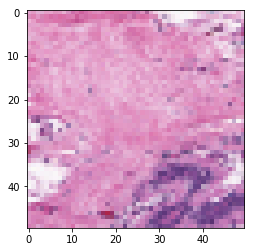

In [5]:
plt.imshow(X[0])
plt.show()

In [6]:
X.shape
# Número de imaágenes, altura, ancho, canales(color)

(5547, 50, 50, 3)

Etiquetas 

In [8]:
Y[0] #la primera imagen no tiene cancer 0= negativa, 1= positivo

0

Conteo de muestras POSITIVAS

In [10]:
np.sum(Y) 

2788

Conteo de muestras NEGATIVAS

In [11]:
len(Y) - np.sum(Y)

2759

Las muestras negativas las vamos a identificar con ´IDC(-)´, y las positivas con ´IDC(+)´

## Muestras positivas

In [12]:
img_plus = X[Y==1]

## Muestras negativas

In [14]:
img_minus = X[Y==0]

In [17]:
def plotImg(a,b):
    """
    a: son todas las imágenes disponibles NEGATIVAS
    b: son todas las imágenes disponibles POSITIVAS
    """
    for row in range (3):
        plt.figure(figsize = (20,10))
        for col in range(3):
            #negativas
            plt.subplot(1, 8, col +1)
            plt.title("IDC(-)")
            plt.imshow(a[row + col])
            plt.axis("off")
            #positivas
            plt.subplot(1, 8, col +4)
            plt.title("IDC(+)")
            plt.imshow(b[row + col])
            plt.axis("off")

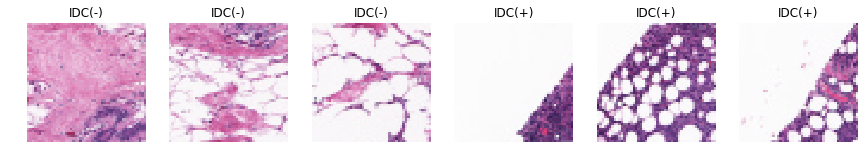

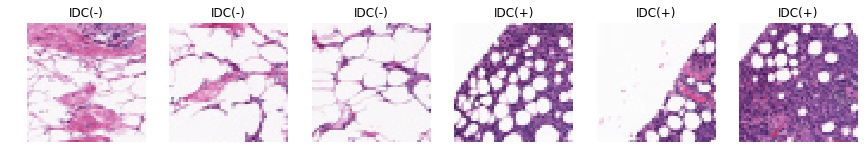

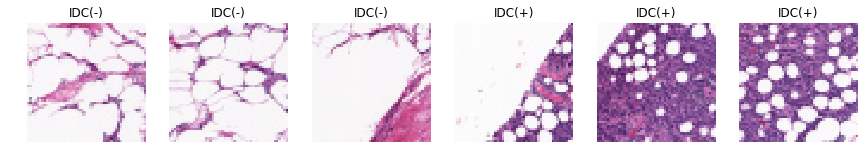

In [19]:
plotImg(img_minus, img_plus)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

In [24]:
len(X)

5547

In [25]:
len(X_train)

4437

Normalizar entradas de X

In [26]:
X_train = X_train/256.0
X_test = X_test/256.0

Nuestros datos tienen que ser primera dimensión (para eso hay que adivinar cuantos números hay en total)

In [27]:
X_train.shape #Matriz de matrices, porque hay 4437 imágenes de 50x50

(4437, 50, 50, 3)

In [28]:
# O sea la primera imagen es 50 la segunda 50 y la tercera 3 por 3 canales, en total cada imagen genera 50x50x3 = 7500 pixeles

In [30]:
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]

Ahora hacemos un resahpe

In [31]:
X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)

In [33]:
X_trainFlat.shape

(4437, 7500)

In [32]:
X_trainFlat[0]

array([0.82421875, 0.6953125 , 0.7890625 , ..., 0.7734375 , 0.62109375,
       0.73828125])

Regresión logística

In [34]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
modelo = model.fit(X_trainFlat, Y_train)

Predicciones

In [38]:
predicciones = modelo.predict(X_testFlat)

In [39]:
predicciones

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [41]:
# 1 = a sí tiene cancer 
# 0 = a sin cancer

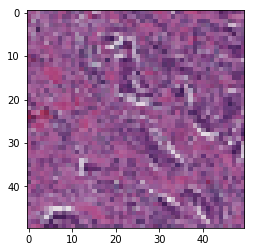

In [42]:
plt.imshow(X_testFlat[0].reshape(50, 50, 3));

Evaluar (comparar) calidad de predicciones 

In [46]:
(len(Y_test) - np.sum(predicciones == Y_test))/len(Y_test) # este valor solo dice donde coincide y con X, el porcentaje de los que fallaste

0.32522522522522523

In [45]:
1- .32

0.6799999999999999